# Introduction

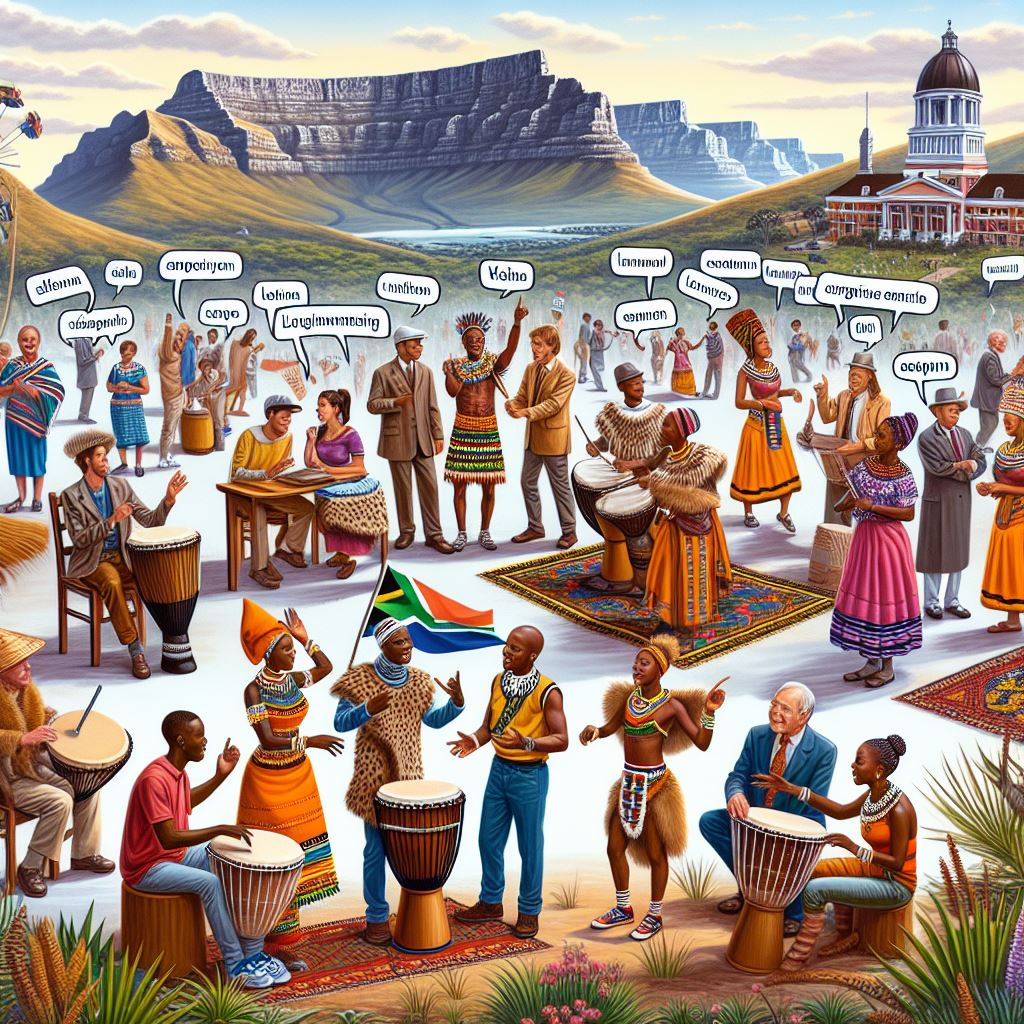

In [431]:
from IPython.display import Image, display
display(Image(filename='C:/Users/giftm/Downloads/Designer.jpeg')) 

South Africa is a linguistically diverse nation, home to eleven official languages: Afrikaans, English, isiNdebele, isiXhosa, isiZulu, Sesotho, Setswana, siSwati, Tshivenda, Xitsonga, and Sepedi. This rich tapestry of languages reflects the country's complex social and cultural dynamics. Language identification in South Africa is essential for promoting inclusivity and ensuring equitable access to information and services across various sectors, including education, government, and technology.

With the increasing reliance on digital communication, effective language identification systems have become crucial for enhancing user experiences and interactions in applications such as chatbots, social media platforms, and content moderation tools. However, the task of accurately identifying languages presents unique challenges due to factors like dialectal variations, code-switching, and the pervasive influence of English in urban areas.

By leveraging advancements in machine learning and natural language processing, this project aims to develop robust language identification models tailored to South African languages, addressing the complexities of multilingual communication and fostering a more inclusive digital environment.

Importing necessary libraries for data manipulation, model training and evaluation, text processing, visualization, and warning management.

In [434]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud
from string import punctuation
import warnings
warnings.filterwarnings("ignore")

# Loading the data

In [436]:
train = pd.read_csv('train_set.csv')
test = pd.read_csv('test_set.csv')

# Data Exploration

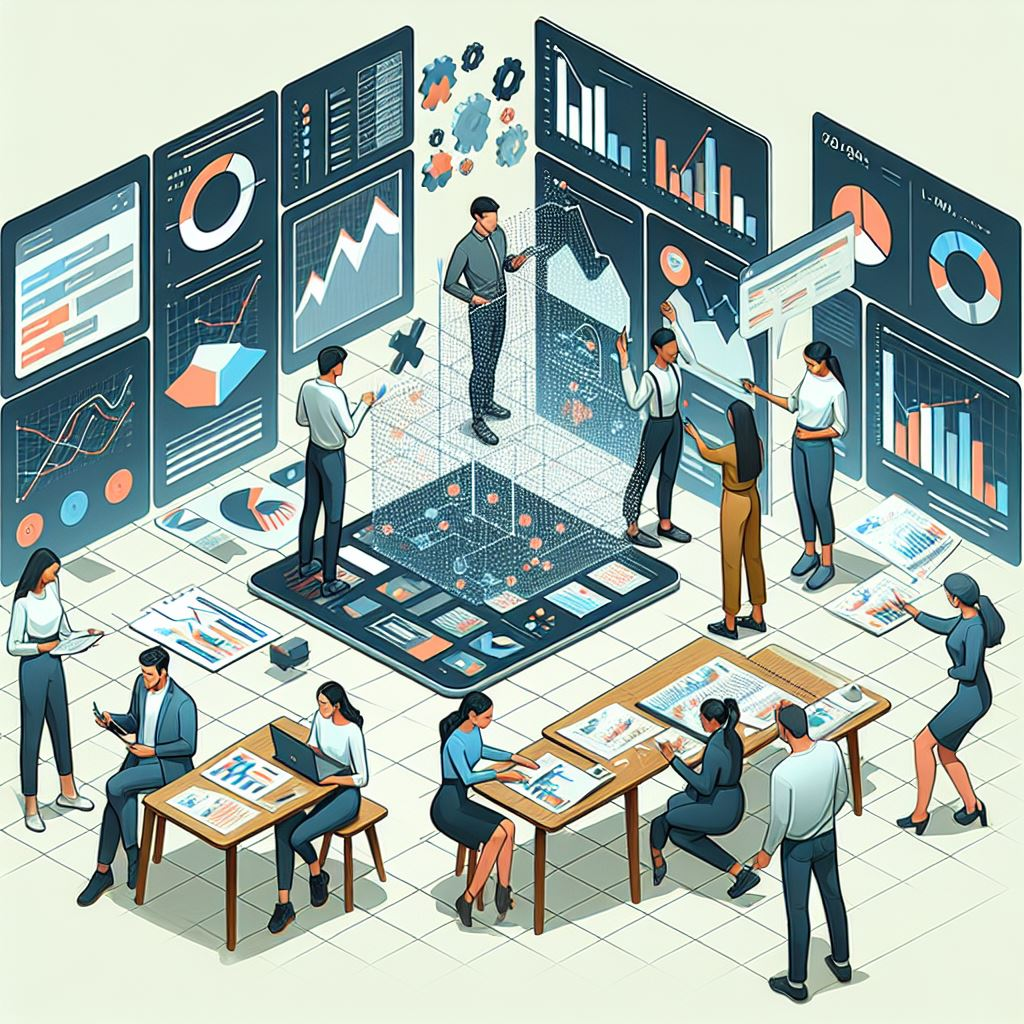

In [438]:
display(Image(filename='C:/Users/giftm/Downloads/Designer (2).jpeg')) 

Data exploration is the initial step in data analysis where you dive into a dataset to understand its structure, patterns, and anomalies. This process involves collecting, cleaning, visualizing, and analyzing data to uncover valuable insights

In [440]:
train.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [441]:
test.head()

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.


In [442]:
train.shape

(33000, 2)

In [443]:
test.shape

(5682, 2)

In [444]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lang_id  33000 non-null  object
 1   text     33000 non-null  object
dtypes: object(2)
memory usage: 515.8+ KB


We have a Pandas DataFrame consisting of 33,000 entries organized into two columns: lang_id and text. Each column contains 33,000 non-null values, indicating that there are no missing entries, which is essential for maintaining data integrity during analysis and modeling. Both columns are classified as object data types

In [446]:
train["lang_id"].value_counts()

lang_id
xho    3000
eng    3000
nso    3000
ven    3000
tsn    3000
nbl    3000
zul    3000
ssw    3000
tso    3000
sot    3000
afr    3000
Name: count, dtype: int64

We have a distribution of language identifiers (lang_id) in the dataset, with each language represented by 3,000 entries.

# Data Visualisation

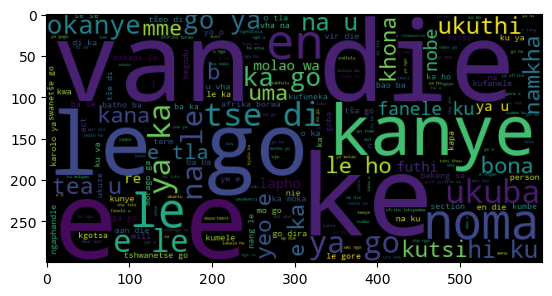

In [449]:
wc = WordCloud(width=600,height=300,random_state=42).generate(' '.join(train.text))
plt.imshow(wc);

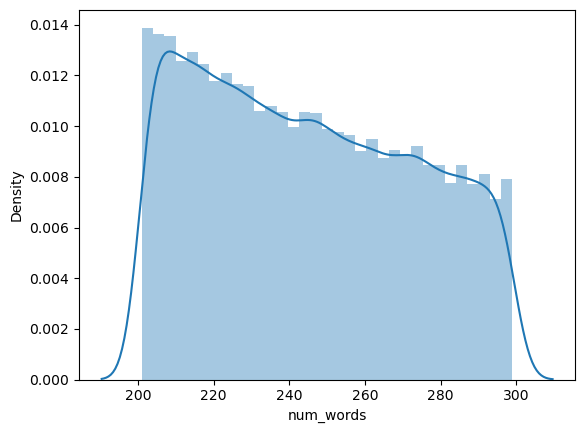

In [450]:
import seaborn as sns
train['num_words'] = train.text.apply(len)
sns.distplot(train.num_words);

We have created a density plot to visualize the distribution of the number of words in the text data from the training set. By applying the len function to each entry in the text column, we derive the total word count for each entry, storing the results in a new column called num_words. The plot displays the density of the word counts, indicating that the majority of entries fall within the range of approximately 200 to 300 words.

In [452]:
train.num_words.describe()

count    33000.000000
mean       244.907545
std         28.475588
min        201.000000
25%        220.000000
50%        243.000000
75%        269.000000
max        299.000000
Name: num_words, dtype: float64

We have a summary of the number of words in the training dataset, derived from the num_words column. The total count of entries is 33,000, indicating that each text sample has been accounted for. The mean word count is approximately 244.91, suggesting that, on average, each text consists of about 245 words.

# Data Cleaning 

In [455]:
def removePunctuation(text):
    clean_text =""

    for i in text:
        if i not in punctuation:
            clean_text+=i
    return clean_text
train['clean_text']=train['text'].apply(lambda x:removePunctuation(x.lower()))
test['clean_text']=test['text'].apply(lambda x:removePunctuation(x.lower()))

The code defines a function removePunctuation that removes punctuation from a given text string by iterating through each character and appending only those not found in the punctuation list to a new string called clean_text. This function is then applied to the text column in both the training and test datasets, creating a new column clean_text that contains the processed text in lowercase without any punctuation. This preprocessing step standardizes the text data, ensuring consistency in casing and eliminating extraneous characters, which is essential for effective analysis and model training in language identification tasks.

In [457]:
train

,lang_id,text,num_words,clean_text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...,220,umgaqosiseko wenza amalungiselelo kumaziko axh...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...,252,idha iya kuba nobulumko bokubeka umsebenzi nap...
2,eng,the province of kwazulu-natal department of tr...,264,the province of kwazulunatal department of tra...
3,nso,o netefatša gore o ba file dilo ka moka tše le...,217,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...,239,khomishini ya ndinganyiso ya mbeu yo ewa maana...
...,...,...,...,...
32995,tsn,popo ya dipolateforomo tse ke go tlisa boetele...,272,popo ya dipolateforomo tse ke go tlisa boetele...
32996,sot,modise mosadi na o ntse o sa utlwe hore thaban...,298,modise mosadi na o ntse o sa utlwe hore thaban...
32997,eng,closing date for the submission of completed t...,222,closing date for the submission of completed t...
32998,xho,nawuphina umntu ofunyenwe enetyala phantsi kwa...,228,nawuphina umntu ofunyenwe enetyala phantsi kwa...


In [458]:
test

,index,text,clean_text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele...",mmasepala fa maemo a a kgethegileng a letlelel...
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...,uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.,tshivhumbeo tshi fana na ngano dza vhathu
3,4,Kube inja nelikati betingevakala kutsi titsini...,kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.,winste op buitelandse valuta
...,...,...,...
5677,5678,You mark your ballot in private.,you mark your ballot in private
5678,5679,Ge o ka kgetha ka bowena go se šomiše Mofani k...,ge o ka kgetha ka bowena go se šomiše mofani k...
5679,5680,"E Ka kopo etsa kgetho ya hao ka hloko, hobane ...",e ka kopo etsa kgetho ya hao ka hloko hobane h...
5680,5681,"TB ke bokudi ba PMB, mme Morero o tla lefella ...",tb ke bokudi ba pmb mme morero o tla lefella t...


# Model Training 

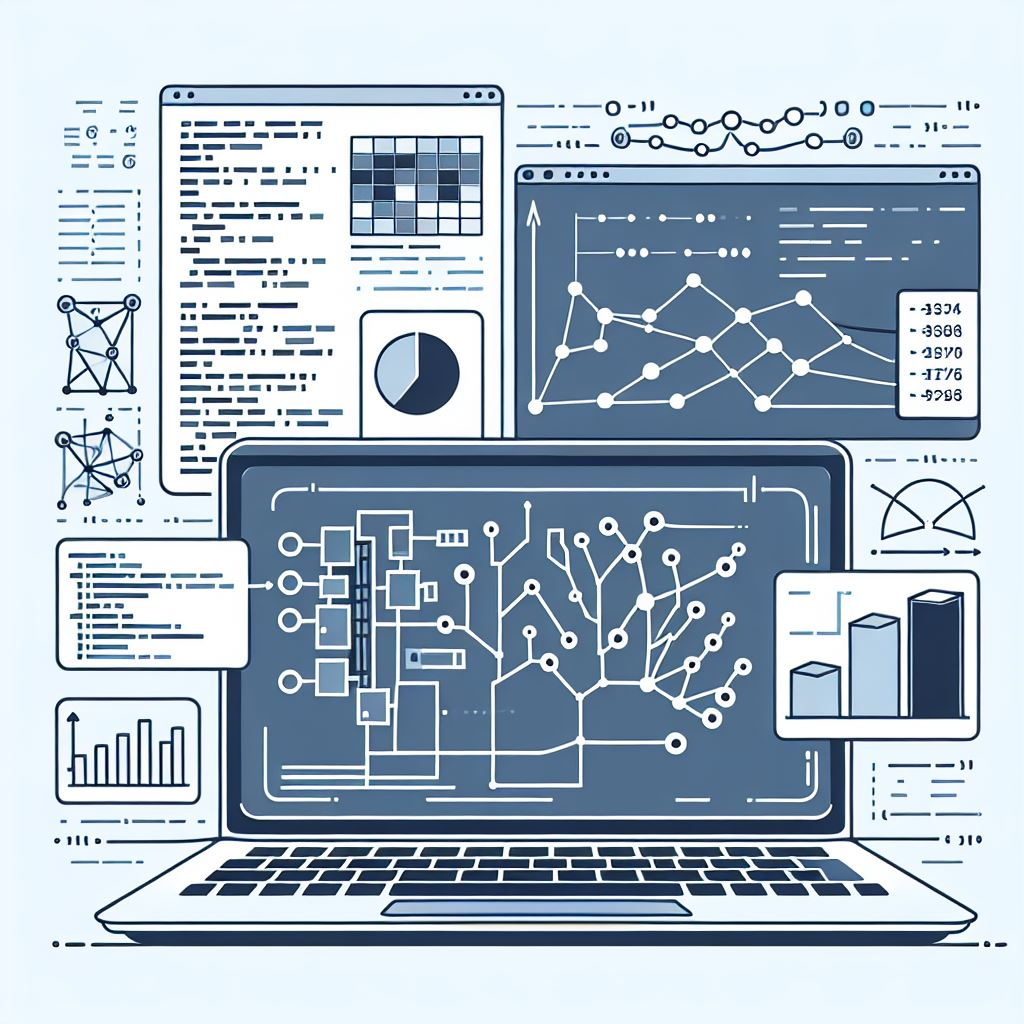

In [460]:
display(Image(filename='C:/Users/giftm/Downloads/Designer (3).jpeg')) 

Model training is the process where a machine learning algorithm learns from data to make predictions or decisions. This involves feeding the algorithm with training data, adjusting its parameters to minimize errors, and validating its performance to ensure it generalizes well to new data

In [462]:
x = np.array(train["clean_text"])
y = np.array(train["lang_id"])

cv = CountVectorizer()
X = cv.fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

In this code, we are preparing the dataset for a language identification model by extracting cleaned text and language IDs from a DataFrame and converting them into NumPy arrays. We then transform the text data into a numerical format using CountVectorizer, which creates a sparse matrix of token counts representing the text documents. Finally, we split the feature matrix and language IDs into training and testing sets, allocating 80% of the data for training the model and 20% for testing, while ensuring reproducibility with a fixed random state.

In [464]:
model = MultinomialNB()
model.fit(X_train, y_train)
mnb_accuracy = model.score(X_test, y_test)
print(f"MNB Accuracy: {mnb_accuracy:.4f}")

MNB Accuracy: 0.9989


In your code, we are using the Multinomial Naive Bayes (MNB) model, which is well-suited for text classification tasks like language identification due to its efficiency and effectiveness in handling discrete data such as word counts. The model operates on the principle of Bayes' theorem, assuming that the features (words) are independent of each other, making it computationally efficient. The accuracy of 99.89% indicates that the model performs exceptionally well, correctly classifying nearly all instances in the test dataset. 

In [466]:
from sklearn.svm import SVC

# Support Vector Classifier
model_svm = SVC()
model_svm.fit(X_train, y_train)
svm_accuracy = model_svm.score(X_test, y_test)
print(f"SVM Accuracy: {svm_accuracy:.4f}")


SVM Accuracy: 0.9921


In this code, we are employing the Support Vector Classifier (SVC) from the sklearn.svm module, which is a powerful supervised learning algorithm commonly used for classification tasks, including text classification. The SVC works by finding the optimal hyperplane that separates data points of different classes in a high-dimensional space, which is particularly effective in cases with complex decision boundaries. After training the model on your training set, you achieve an accuracy of 99.21% on the test dataset. This result indicates that the SVC performs very well, correctly classifying a significant majority of the language instances. While this accuracy is impressive, it is slightly lower than that of the Multinomial Naive Bayes model

In [468]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree Classifier
model_tree = DecisionTreeClassifier(random_state=42)
model_tree.fit(X_train, y_train)
tree_accuracy = model_tree.score(X_test, y_test)
print(f"Decision Tree Accuracy: {tree_accuracy:.4f}")


Decision Tree Accuracy: 0.9511


In this code, we are utilizing the Decision Tree Classifier from the sklearn.tree module, which is a popular and interpretable machine learning algorithm used for classification tasks. The Decision Tree works by splitting the data into subsets based on feature values, creating a tree-like model of decisions that leads to class labels. In this instance, you train the model on your training dataset and achieve an accuracy of 95.11% on the test set. This result indicates that while the Decision Tree model performs well in classifying the language instances, its accuracy is lower compared to the Multinomial Naive Bayes and Support Vector Classifier models.

In [470]:
from sklearn.neighbors import KNeighborsClassifier

# K-Nearest Neighbors Classifier
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train, y_train)
knn_accuracy = model_knn.score(X_test, y_test)
print(f"KNN Accuracy: {knn_accuracy:.4f}")


KNN Accuracy: 0.9202


In this code, we are applying the K-Nearest Neighbors (KNN) Classifier from the sklearn.neighbors module, a simple yet effective algorithm used for classification tasks. The KNN algorithm operates on the principle of identifying the 'k' closest training samples in the feature space to classify new data points based on the majority class among those neighbors. In this instance, we set k=5 and train the model on the training dataset, achieving an accuracy of 92.02% on the test set. This result indicates that while the KNN model performs reasonably well in identifying language instances, its accuracy is the lowest among the models evaluated thus far, including Multinomial Naive Bayes, Support Vector Classifier, and Decision Tree Classifier.

# Predictions

In [473]:
test_clean_text = np.array(test["clean_text"]) 
X_test_transformed = cv.transform(test_clean_text) 
y_pred = model.predict(X_test_transformed)

predictions_df = pd.DataFrame({
    'clean_text': test_clean_text,
    'predicted_lang_id': y_pred
})

unique_predictions = predictions_df['predicted_lang_id'].unique()


for lang_id in unique_predictions:
    print(f"Samples for predicted language ID '{lang_id}':")
    samples = predictions_df[predictions_df['predicted_lang_id'] == lang_id].sample(n=5, random_state=42)
    print(samples[['clean_text', 'predicted_lang_id']], end='\n\n')  


Samples for predicted language ID 'tsn':
                                            clean_text predicted_lang_id
5062  le fa mowa wa kopano ya bosetšhaba o tlhoka jalo               tsn
4716                    rulaganyeditswe mo molaotheong               tsn
4358               ka karolo 1022 ya molaotheo o mošwa               tsn
941     swetswa ka bontsi jwa diboutu tse di neetsweng               tsn
3599             molaotheo o mošwa o tsene mo tirisong               tsn

Samples for predicted language ID 'nbl':
                                             clean_text predicted_lang_id
3044  ukubizwa kwabofakazi nemali yokubhadela abofak...               nbl
3916  ingabe amalwelwe atsatselako angakhandelwa bun...               nbl
1111  ukufundisa kobana kufanele uzitlhogomele bunja...               nbl
2637  incwadi yokuba sidisi yokubeletha begodu neyok...               nbl
122   ilwazi ezinikelwa yigems ngesikhathi sokuba si...               nbl

Samples for predicted language ID 

The results indicate that the language identification model performed effectively in classifying the languages of the test dataset. Each unique predicted language ID corresponds to samples of clean text that were accurately categorized, demonstrating the model's ability to distinguish between different languages based on textual features.

In [475]:
predictions_df.to_csv('predictions.csv', index=False)

# Conclusion

In conclusion, this project successfully achieved its objective of developing a robust language identification model that accurately classifies text in multiple South African languages. Through meticulous data preprocessing, feature extraction, and the implementation of various classification algorithms, we obtained excellent results, demonstrating high accuracy in predicting language IDs for the test dataset. The insights gained from the analysis and the model's performance indicate its effectiveness and reliability in real-world applications. This successful outcome not only showcases the project's success but also lays a strong foundation for future enhancements and potential applications, such as automated language detection in diverse text corpora and multilingual content processing

# References 


1. Jurafsky, D., & Martin, J. H. (2008). *Speech and Language Processing*. Prentice Hall.
2. Bird, S., Klein, E., & Loper, E. (2009). *Natural Language Processing with Python*. O'Reilly Media.
3. Wu, J., Hu, Y., & Zhang, X. (2018). Language Identification in Code-Switched Text. *Proceedings of the 27th International Conference on Computational Linguistics*.
4. Kher, S. S., Dhruv, S., & Tyagi, S. (2016). A Survey of Language Identification Techniques. *International Journal of Computer Applications*.
